# 📊 Naukri.com Dataset Cleaning & Preprocessing
This notebook performs a step-by-step cleaning of the Naukri.com dataset, ensuring data quality and consistency for further analysis.

## 📥 Step 1: Load the Dataset
We start by loading the dataset and displaying basic information.

In [3]:
import pandas as pd

df = pd.read_csv('naukri_data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87160 entries, 0 to 87159
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        87160 non-null  int64 
 1   company_name  87159 non-null  object
 2   description   87160 non-null  object
 3   experience    87160 non-null  object
 4   salary        87160 non-null  object
 5   location      87160 non-null  object
 6   skills        87160 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


,job_id,company_name,description,experience,salary,location,skills
0,1,Trigent Software,Hiring (0-3years) - Customer Support / Night s...,0-3 Yrs,Not disclosed,"Navi Mumbai, Mumbai (All Areas)","Customer Support, Customer Service, Non Voice ..."
1,2,Merkle Science,Analyst,1-2 Yrs,Not disclosed,"Mumbai, New Delhi, Pune, Bengaluru","Analyst, data science, Analytics, Science, Dat..."
2,3,Merkle Science,Analyst,1-2 Yrs,Not disclosed,"Mumbai, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
3,4,Merkle Science,Analyst,1-2 Yrs,Not disclosed,"Mumbai, New Delhi, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
4,5,Accenture,GN-Industrial- Traffic Management - Industrial,1-6 Yrs,Not disclosed,"Mumbai, Pune, Chennai","Traffic Management, PMP, Kanban, Project Manag..."


## 🔍 Step 2: Handling Missing Values
We check for missing values and decide on appropriate replacements.

job_id          0
company_name    1
description     0
experience      0
salary          0
location        0
skills          0
dtype: int64

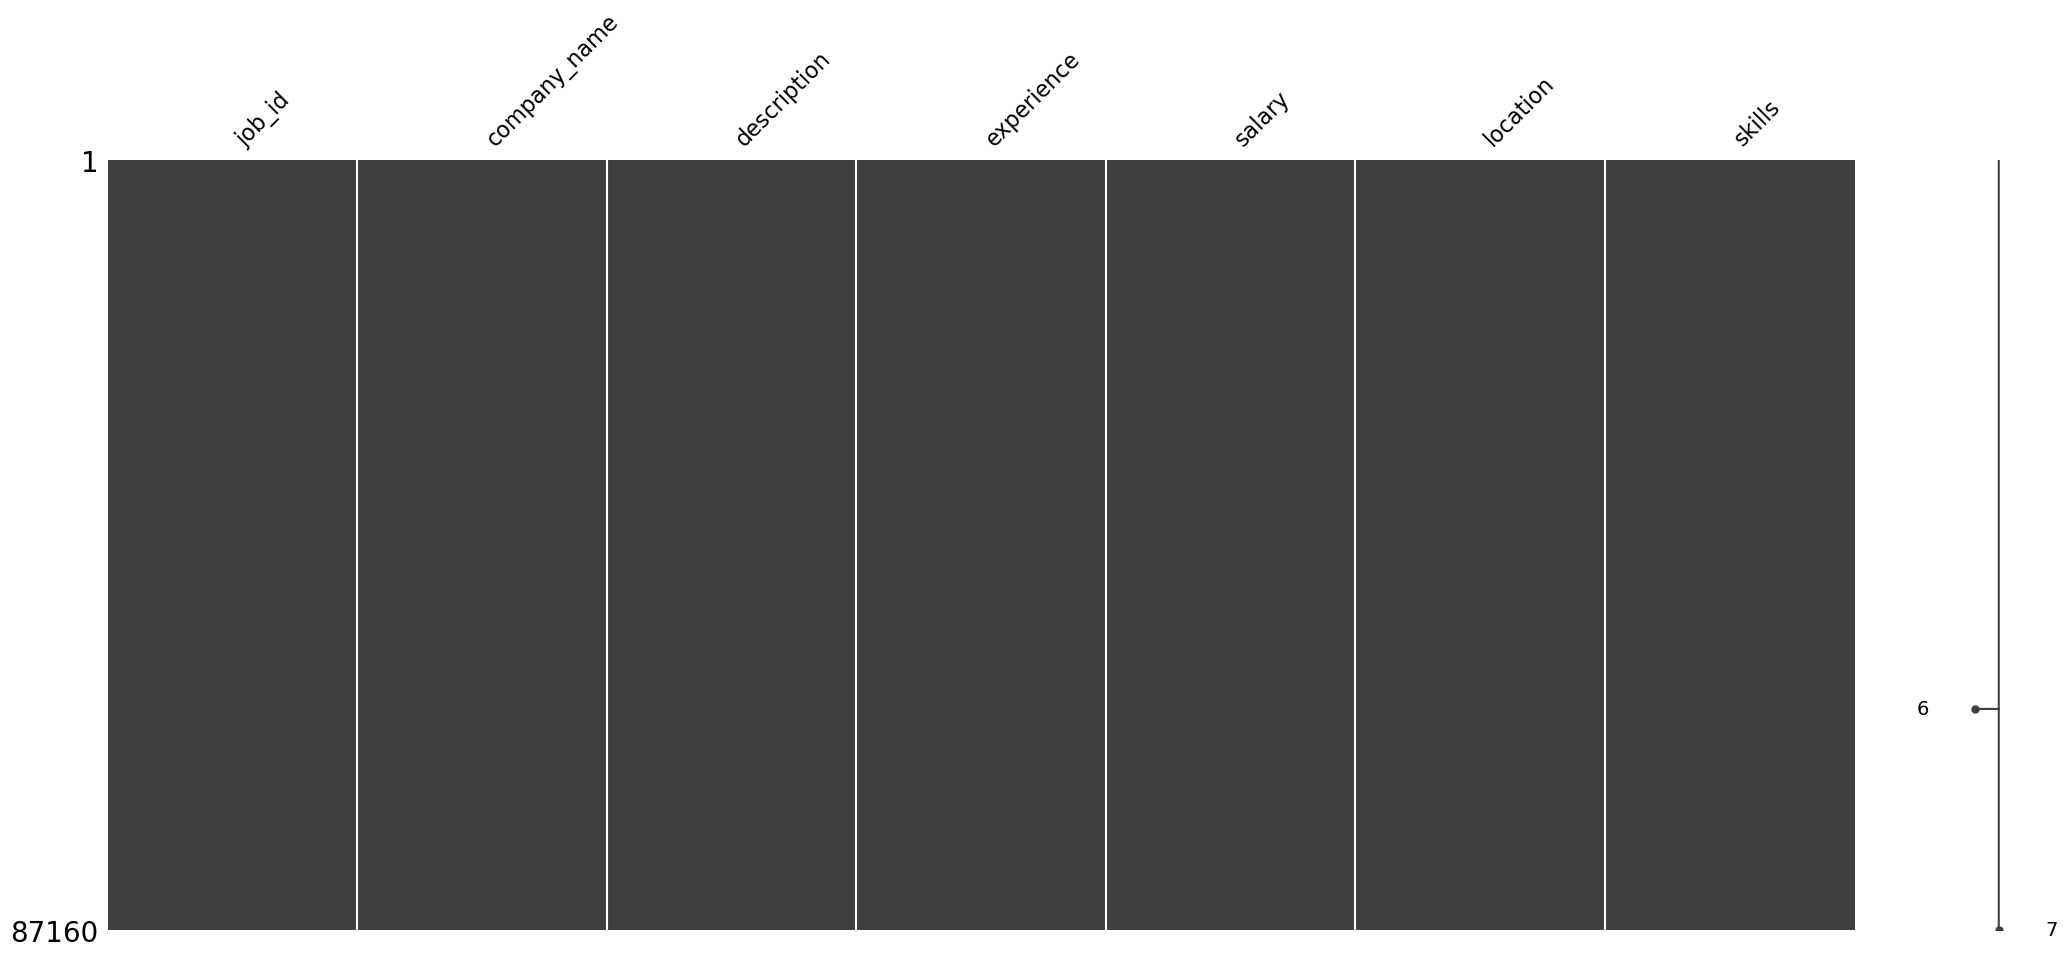

In [6]:
import missingno as msno
# Visualize missing values
msno.matrix(df)
df.isnull().sum()

## 💰 Step 3: Cleaning Salary Column
Salary values like 'Not Disclosed' will be replaced with company-wise averages.

In [18]:
import numpy as np

df['salary'] = df['salary'].astype(str)

df['salary'] = df['salary'].replace(['Not Disclosed', 'As per Industry Standards'], np.nan)

df['salary'] = df['salary'].str.extract('(\d+)', expand=False)

df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

df['salary'] = df.groupby('company_name')['salary'].transform(lambda x: x.fillna(x.mean()))

df['salary'].fillna(df['salary'].median(), inplace=True)

print("✅ Salary column cleaned successfully!")


✅ Salary column cleaned successfully!


## 🏢 Step 4: Cleaning Company Names
Entries like 'Company Not Found' will be handled appropriately.

In [26]:
df['company_name'] = df['company_name'].replace('Company Not Found', 'Unknown Company')
df

,job_id,company_name,description,experience,salary,location,skills
0,1,Trigent Software,Hiring (0-3years) - Customer Support / Night s...,0-3 Yrs,16.577778,"Navi Mumbai, Mumbai (All Areas)","Customer Support, Customer Service, Non Voice ..."
1,2,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, New Delhi, Pune, Bengaluru","Analyst, data science, Analytics, Science, Dat..."
2,3,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
3,4,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, New Delhi, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
4,5,Accenture,GN-Industrial- Traffic Management - Industrial,1-6 Yrs,1.857143,"Mumbai, Pune, Chennai","Traffic Management, PMP, Kanban, Project Manag..."
...,...,...,...,...,...,...,...
87155,87156,Huey Tech/ PAYME,Senior Full Stack Developer/ Full Stack Developer,1-6 Yrs,6.375000,Noida,"Fullstack Development, Rest Api Integration, D..."
87156,87157,Company not found,ML Ops Engineer,8-10 Yrs,30.000000,Chennai,"CI/CD, ML, Python, PyTorch, Docker, MLflow, cl..."
87157,87158,Company not found,Front End Developer,3-5 Yrs,8.350930,Raipur,"React.Js, Typescript, Redux, Npm, React Native..."
87158,87159,Company not found,OBIEE/OAS Developer,3-8 Yrs,8.350930,Hybrid - Gurugram,"Oracle SQL, OBIEE, OAS, Development, SQL, Oracle"


## 📍 Step 5: Handling Missing Locations
Missing locations will be filled using company-wise mode values.

In [28]:
df['location'] = df.groupby('company_name')['location'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df

,job_id,company_name,description,experience,salary,location,skills
0,1,Trigent Software,Hiring (0-3years) - Customer Support / Night s...,0-3 Yrs,16.577778,"Navi Mumbai, Mumbai (All Areas)","Customer Support, Customer Service, Non Voice ..."
1,2,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, New Delhi, Pune, Bengaluru","Analyst, data science, Analytics, Science, Dat..."
2,3,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
3,4,Merkle Science,Analyst,1-2 Yrs,6.375000,"Mumbai, New Delhi, Pune, Bengaluru","Usage, data science, Senior Analyst, Analytics..."
4,5,Accenture,GN-Industrial- Traffic Management - Industrial,1-6 Yrs,1.857143,"Mumbai, Pune, Chennai","Traffic Management, PMP, Kanban, Project Manag..."
...,...,...,...,...,...,...,...
87155,87156,Huey Tech/ PAYME,Senior Full Stack Developer/ Full Stack Developer,1-6 Yrs,6.375000,Noida,"Fullstack Development, Rest Api Integration, D..."
87156,87157,Company not found,ML Ops Engineer,8-10 Yrs,30.000000,Chennai,"CI/CD, ML, Python, PyTorch, Docker, MLflow, cl..."
87157,87158,Company not found,Front End Developer,3-5 Yrs,8.350930,Raipur,"React.Js, Typescript, Redux, Npm, React Native..."
87158,87159,Company not found,OBIEE/OAS Developer,3-8 Yrs,8.350930,Hybrid - Gurugram,"Oracle SQL, OBIEE, OAS, Development, SQL, Oracle"


## 💾 Step 6: Save the Cleaned Dataset
Finally, we save the cleaned dataset for further use.

In [23]:
df.to_csv('cleaned_naukri_data.csv', index=False)
print('✅ Cleaning Complete! File Saved.')

✅ Cleaning Complete! File Saved.


## 📊 Data Visualizations
Here we analyze key trends in salary, company job listings, experience levels, job locations, and skills using visualizations.


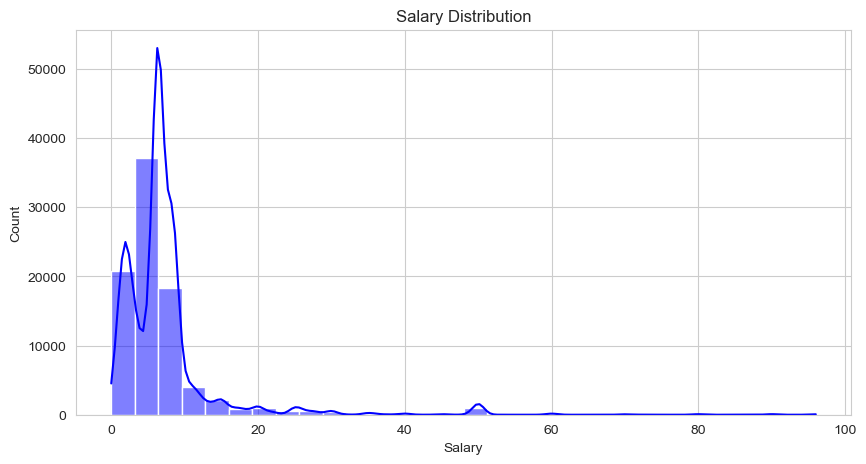

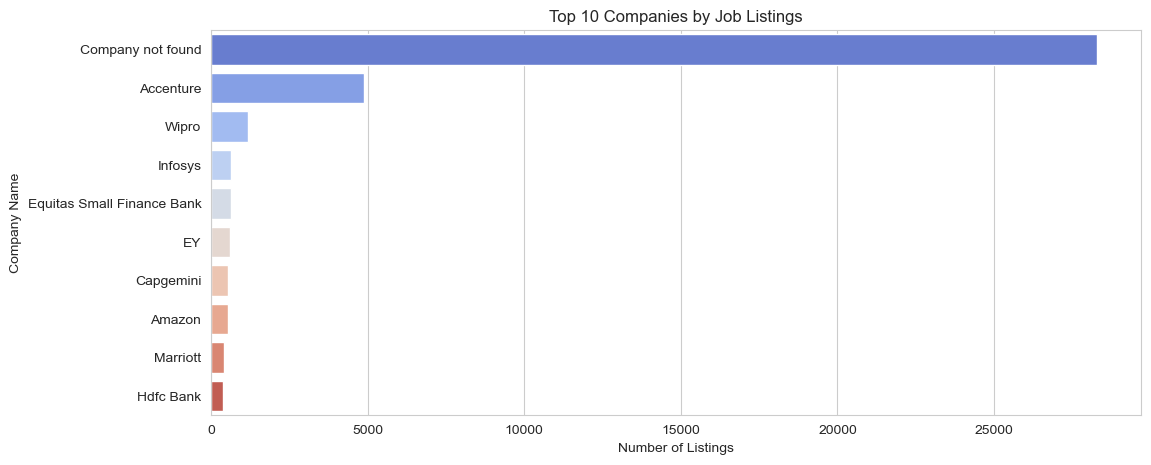

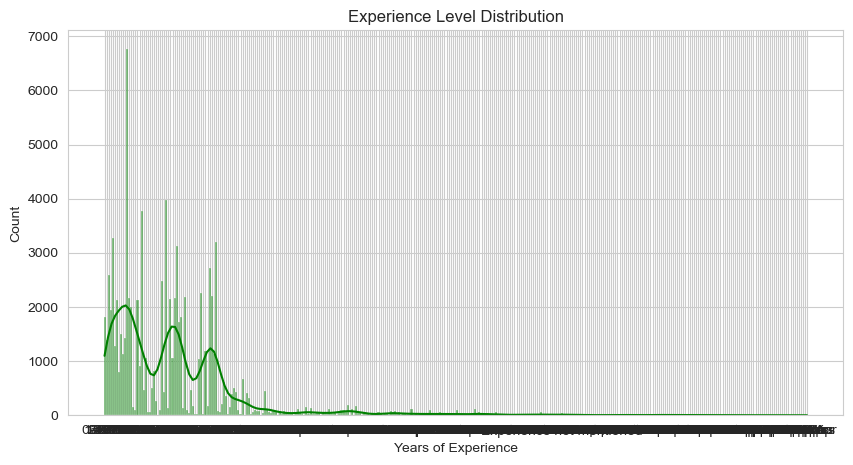

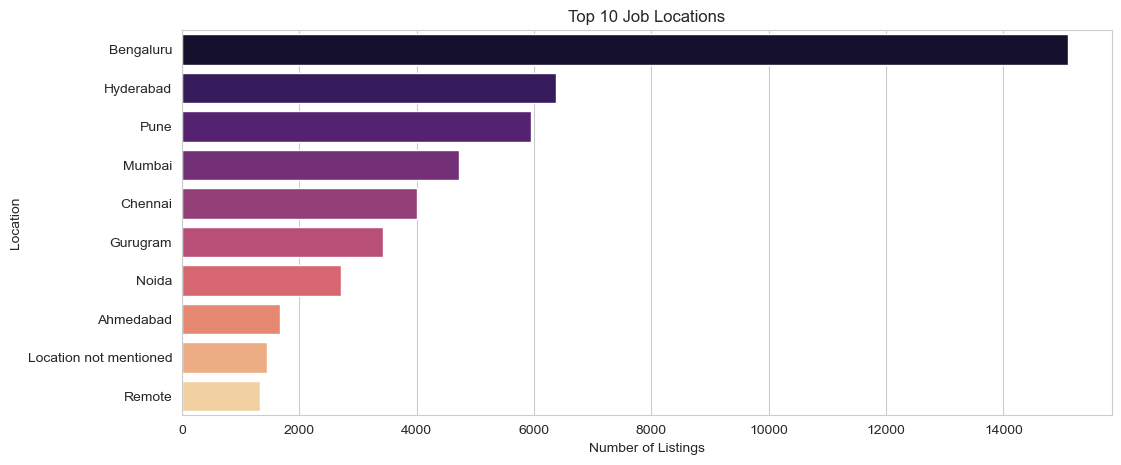

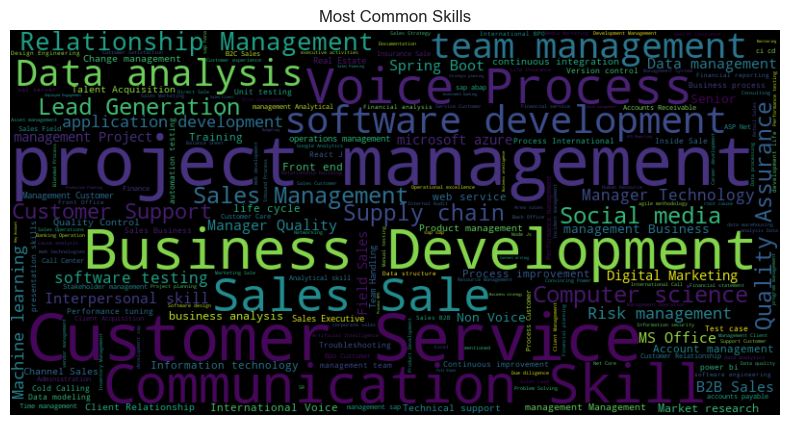

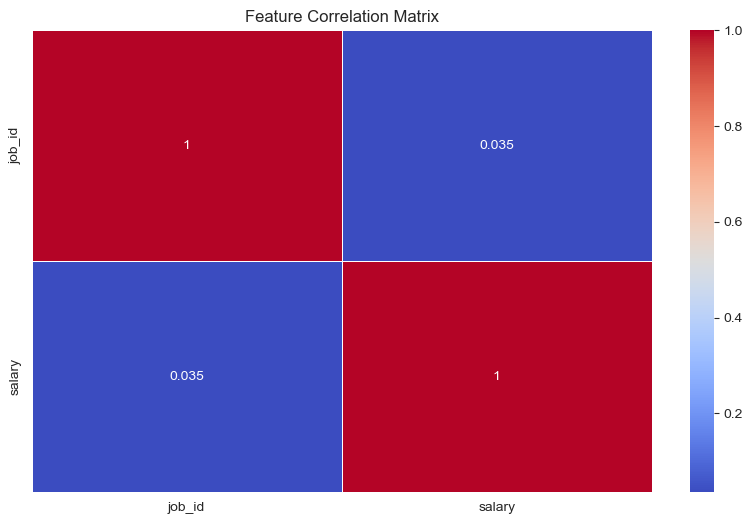

✅ All Visualizations Generated Successfully!


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['salary'].dropna(), bins=30, kde=True, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 5))
top_companies = df['company_name'].value_counts().nlargest(10)
sns.barplot(y=top_companies.index, x=top_companies.values, palette='coolwarm')
plt.title("Top 10 Companies by Job Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Company Name")
plt.show()

if 'experience' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['experience'].dropna(), bins=20, kde=True, color='green')
    plt.title("Experience Level Distribution")
    plt.xlabel("Years of Experience")
    plt.ylabel("Count")
    plt.show()

plt.figure(figsize=(12, 5))
top_locations = df['location'].value_counts().nlargest(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='magma')
plt.title("Top 10 Job Locations")
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.show()

if 'skills' in df.columns:
    text = ' '.join(df['skills'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Skills")
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

print("✅ All Visualizations Generated Successfully!")


## Tokenization & Text Preprocessing
🔹 Cleaning & Structuring Text Data for Analysis
Why Tokenization?
Tokenization helps break text into meaningful words (tokens), making it easier for analysis. We also remove unnecessary words (stopwords) and punctuation to improve data quality.

Steps in Preprocessing:
1️⃣ Convert text to lowercase for consistency.
2️⃣ Tokenize words (split text into individual words).
3️⃣ Remove punctuation and stopwords (words like the, is, and).
4️⃣ Store the cleaned tokens in new columns for further analysis.

This process will help in analyzing Skills, Job Descriptions, and Company Reviews effectively for modeling and visualization. 

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv(r"cleaned_naukri_data.csv")  

def preprocess_text(text):
    if pd.isnull(text):
        return "" 

    text = text.lower() 
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalnum()] 
    tokens = [word for word in tokens if word not in stopwords.words('english')]  
    
    return " ".join(tokens)

if 'skills' in df.columns:
    df['skills_tokenized'] = df['skills'].apply(preprocess_text)
else:
    print("Column 'skills' not found!")

if 'description' in df.columns:
    df['job_description_tokenized'] = df['description'].apply(preprocess_text)
else:
    print("Column 'description' not found! Check column names.")

df[['skills', 'skills_tokenized', 'description', 'job_description_tokenized']].head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,skills,skills_tokenized,description,job_description_tokenized
0,"Customer Support, Customer Service, Non Voice ...",customer support customer service non voice pr...,Hiring (0-3years) - Customer Support / Night s...,hiring customer support night shift
1,"Analyst, data science, Analytics, Science, Dat...",analyst data science analytics science data an...,Analyst,analyst
2,"Usage, data science, Senior Analyst, Analytics...",usage data science senior analyst analytics se...,Analyst,analyst
3,"Usage, data science, Senior Analyst, Analytics...",usage data science senior analyst analytics se...,Analyst,analyst
4,"Traffic Management, PMP, Kanban, Project Manag...",traffic management pmp kanban project manageme...,GN-Industrial- Traffic Management - Industrial,traffic management industrial


In [42]:
# Tokenization & Text Preprocessing

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    if pd.isnull(text):
        return []  

    text = text.lower()  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalnum()] 
    tokens = [word for word in tokens if word not in stopwords.words('english')] 
    return tokens 

df['skills_tokenized'] = df['skills'].apply(preprocess_text)
df['job_description_tokenized'] = df['description'].apply(preprocess_text)

df[['skills', 'skills_tokenized', 'description', 'job_description_tokenized']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,skills,skills_tokenized,description,job_description_tokenized
0,"Customer Support, Customer Service, Non Voice ...","[customer, support, customer, service, non, vo...",Hiring (0-3years) - Customer Support / Night s...,"[hiring, customer, support, night, shift]"
1,"Analyst, data science, Analytics, Science, Dat...","[analyst, data, science, analytics, science, d...",Analyst,[analyst]
2,"Usage, data science, Senior Analyst, Analytics...","[usage, data, science, senior, analyst, analyt...",Analyst,[analyst]
3,"Usage, data science, Senior Analyst, Analytics...","[usage, data, science, senior, analyst, analyt...",Analyst,[analyst]
4,"Traffic Management, PMP, Kanban, Project Manag...","[traffic, management, pmp, kanban, project, ma...",GN-Industrial- Traffic Management - Industrial,"[traffic, management, industrial]"


In [ ]:
import re

df["skills"] = df["skills"].apply(lambda x: re.sub(r'[^\w\s]', "", str(x)) if pd.notnull(x) else "")
df["description"] = df["description"].apply(lambda x: re.sub(r'[^\w\s]', "", str(x)) if pd.notnull(x) else "")

df[["skills", "description"]].head()


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalnum()]  
    tokens = [word for word in tokens if word not in stop_words]  
    return tokens  

df["skills_tokenized"] = df["skills"].apply(tokenize_text)
df["job_description_tokenized"] = df["description"].apply(tokenize_text)

tokenized_df = df[["skills_tokenized", "job_description_tokenized"]]
tokenized_df.to_csv("tokenized_data.csv", index=False)

print("Tokenized data saved as 'tokenized_data.csv'")

df[["skills_tokenized", "job_description_tokenized"]].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenized data saved as 'tokenized_data.csv'


,skills_tokenized,job_description_tokenized
0,"[Customer, Support, Customer, Service, Non, Vo...","[Hiring, Customer, Support, Night, shift]"
1,"[Analyst, data, science, Analytics, Science, D...",[Analyst]
2,"[Usage, data, science, Senior, Analyst, Analyt...",[Analyst]
3,"[Usage, data, science, Senior, Analyst, Analyt...",[Analyst]
4,"[Traffic, Management, PMP, Kanban, Project, Ma...","[Traffic, Management, Industrial]"


## 📌 Steps Covered in This Code:
1️⃣ Convert text data into numerical form using TF-IDF Vectorization.
2️⃣ Split data into training & testing sets.
3️⃣ Train a model.
4️⃣ Evaluate performance using accuracy, precision, recall, and F1-score.

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df = pd.read_csv("cleaned_naukri_data.csv")

df.dropna(subset=['skills', 'description'], inplace=True)

df['job_description_tokenized'] = df['description'].apply(tokenize_text)
df['skills_tokenized'] = df['skills'].apply(tokenize_text)

df['combined_text'] = df['job_description_tokenized'] + " " + df['skills_tokenized']

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['combined_text'])

num_clusters = 10  
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['job_role_encoded'] = kmeans.fit_predict(X)

X_train, X_test, y_train, y_test = train_test_split(X, df['job_role_encoded'], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='hist')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\n🔹 {name} Model Accuracy: {accuracy:.4f}")
    print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
    print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("🔹 R² Score:", r2)
    print("🔹 Mean Squared Error (MSE):", mse)
    print("🔹 Mean Absolute Error (MAE):", mae)

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:01:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 Random Forest Model Accuracy: 0.9402

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       530
           1       0.97      0.92      0.94       868
           2       0.90      0.94      0.92      2480
           3       0.96      0.98      0.97      1796
           4       0.97      0.96      0.97       614
           5       0.95      0.94      0.94      6188
           6       0.91      0.96      0.93      1588
           7       0.96      0.89      0.92       619
           8       0.97      0.89      0.93       507
           9       0.95      0.90      0.92      2242

    accuracy                           0.94     17432
   macro avg       0.95      0.94      0.94     17432
weighted avg       0.94      0.94      0.94     17432


🔹 Confusion Matrix:
 [[ 518    2    3    0    0    0    2    2    0    3]
 [   1  798   17    2    0   30    7    3    0   10]
 [   0    5 2322    0    0   73   56    5    0